In [ ]:
!pip install LTNtorch
import torch
import numpy as np
import pandas as pd
import ltn
import matplotlib.pyplot as plt

In [ ]:
data_100 = '/content/trains_data_100 - trains-data.csv'
data_10  = '/content/trains-data.csv'

# Questão 2
Implemente uma solução em LTNTorch para o problema dos trens
considerando os 11 predicados.

## Preciso criar, em LTNTorch, um modelo que aprenda os 11 predicados a seguir:
1. num_cars(t, nc), em que t ∊ [1..10] e nc ∊ [3..5].
2. num_loads(t, nl) em que t ∊ [1..10] e nl ∊ [1..4].
3. num_wheels(t, c, w) em que t ∊ [1..10] e c ∊ [1..4] e w ∊ [2..3].
4. length(t, c, l) em que t ∊ [1..10] e c ∊ [1..4] e l ∊ [-1..1] (-1 denota curto e 1 longo)
5. shape(t, c, s) em que t ∊ [1..10] e c ∊ [1..4] e s ∊ [1..10] (um número para
cada forma).
6. num_cars_loads(t, c, ncl) em que t ∊ [1..10] e c ∊ [1..4] e ncl ∊ [0..3].
7. load_shape(t, c, ls) em que t ∊ [1..10] e c ∊ [1..4] e ls ∊ [1..4].
8. next_crc(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em círculo.
9. next_hex(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em hexágono.
10. next_rec(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em retângulo.
11. next_tri(t, c, x) em que t ∊ [1..10] e c ∊ [1..4] e x ∊ [-1..1], em que o vagão c do trem t tem um vagão adjacente com cargas em triângulo

In [ ]:
df10  = pd.read_csv(data_10)
df100 = pd.read_csv(data_100)

In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               10 non-null     int64  
 1   Number_of_different_loads    10 non-null     int64  
 2   num_wheels1                  10 non-null     int64  
 3   length1                      10 non-null     object 
 4   shape1                       10 non-null     object 
 5   num_loads1                   10 non-null     int64  
 6   load_shape1                  10 non-null     object 
 7   num_wheels2                  10 non-null     int64  
 8   length2                      10 non-null     object 
 9   shape2                       10 non-null     object 
 10  num_loads2                   10 non-null     int64  
 11  load_shape2                  10 non-null     object 
 12  num_wheels3                  7 non-null      float64
 13  length3                

In [ ]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  98 non-null     object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   97 non-null     float64
 11  load_shape2                  97 non-null     object 
 12  num_wheels3                  75 non-null     float64
 13  length3              

In [ ]:
# Nan treatment
def input_nan(df, columns, value):
  for col in columns:
    df[col] = df[col].fillna(value)
  return df

categorical_columns = [[f'length{i}', f'shape{i}', f'load_shape{i}'] for i in range(1, 5)]
categorical_columns = [item for sublist in categorical_columns for item in sublist]
input_value = ""
df10 = input_nan(df10, categorical_columns, input_value)
df100 = input_nan(df100, categorical_columns, input_value)

In [ ]:
numerical_columns = [[f'num_wheels{i}', f'num_loads{i}'] for i in range(1, 5)]
numerical_columns = [item for sublist in numerical_columns for item in sublist]
input_value = 0
df10 = input_nan(df10, numerical_columns, input_value)
df100 = input_nan(df100, numerical_columns, input_value)

In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               10 non-null     int64  
 1   Number_of_different_loads    10 non-null     int64  
 2   num_wheels1                  10 non-null     int64  
 3   length1                      10 non-null     object 
 4   shape1                       10 non-null     object 
 5   num_loads1                   10 non-null     int64  
 6   load_shape1                  10 non-null     object 
 7   num_wheels2                  10 non-null     int64  
 8   length2                      10 non-null     object 
 9   shape2                       10 non-null     object 
 10  num_loads2                   10 non-null     int64  
 11  load_shape2                  10 non-null     object 
 12  num_wheels3                  10 non-null     float64
 13  length3                

In [ ]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_cars               100 non-null    int64  
 1   Number_of_different_loads    100 non-null    int64  
 2   num_wheels1                  100 non-null    int64  
 3   length1                      100 non-null    object 
 4   shape1                       100 non-null    object 
 5   num_loads1                   100 non-null    int64  
 6   load_shape1                  100 non-null    object 
 7   num_wheels2                  100 non-null    int64  
 8   length2                      100 non-null    object 
 9   shape2                       100 non-null    object 
 10  num_loads2                   100 non-null    float64
 11  load_shape2                  100 non-null    object 
 12  num_wheels3                  100 non-null    float64
 13  length3              

In [ ]:
df100.load_shape1.unique(), df100.load_shape2.unique(), df100.load_shape3.unique(), df100.load_shape4.unique()

(array(['rectanglod(short)', 'circlelod', 'rectanglod(medium)',
        'rectanglod(long)', 'trianglod', 'invtrianglod', 'hexaglod', '',
        'upsidedowntri'], dtype=object),
 array(['trianglod', 'rectanglod(medium)', 'rectanglod(short)',
        'circlelod', 'rectanglod(long)', 'diamondlod', 'invtrianglod',
        'hexaglod', '', 'rectanglod'], dtype=object),
 array(['rectanglod(long)', 'circlelod', 'trianglod', 'rectanglod(medium)',
        '', 'rectanglod(short)', 'invtrianglod', 'hexaglod', 'diamondlod'],
       dtype=object),
 array(['', 'circlelod', 'trianglod', 'rectanglod(medium)',
        'rectanglod(long)', 'diamondlod', 'rectanglod(short)'],
       dtype=object))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

def transform_dataframe(df):
    # List to hold the new rows
    transformed_rows = []

    for idx, row in df.iterrows():
        train_number = idx
        num_cars = row["Number_of_cars"]
        num_loads = row["Number_of_different_loads"]
        direction = row["Class_attribute"]
        # Iterate through each car in the train
        for i in range(1, num_cars): # num_cars counts the train head itself, which is not used for any features.
            car_number = i
            num_wheels = row[f"num_wheels{i}"]
            length = row[f"length{i}"]
            shape = row[f"shape{i}"]
            num_loads_i = row[f"num_loads{i}"]
            load_shape = row[f"load_shape{i}"]

            # Determine the next shape values based on current shape
            match shape:
              case _ if "circle" in shape:
                  next_crc = row["Circle_next_to_circle"]
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0
              case _ if "rect" in shape:
                  next_crc = row["Rectangle_next_to_circle"]
                  next_hex = row["Rectangle_next_to_hexagon"]
                  next_rec = row["Rectangle_next_to_rectangle"]
                  next_tri = row["Rectangle_next_to_triangle"]
              case _ if "tri" in shape:
                   next_crc = row["Triangle_next_to_circle"]
                   next_hex = row["Triangle_next_to_hexagon"]
                   next_rec = 0
                   next_tri = row["Triangle_next_to_triangle"]
              case _ if "hex" in shape:
                  next_crc = row["Hexagon_next_to_circle"]
                  next_hex = row["Hexagon_next_to_hexagon"]
                  next_rec = 0
                  next_tri = 0
              case _:
                  next_crc = 0
                  next_hex = 0
                  next_rec = 0
                  next_tri = 0

            # Append the new row
            transformed_rows.append({
                "train_number": train_number,
                "num_cars": num_cars,
                "num_loads": num_loads,
                "num_wheels": num_wheels,
                "car_number": car_number,
                "length": length,
                "shape": shape,
                "num_cars_loads": num_loads_i,
                "load_shape": load_shape,
                "next_crc": next_crc,
                "next_hex": next_hex,
                "next_rec": next_rec,
                "next_tri": next_tri,
                "direction": direction
            })

    # Create a new DataFrame from the transformed rows
    transformed_df = pd.DataFrame(transformed_rows)
    return transformed_df

# Example usage
transformed_df = transform_dataframe(df100)
transformed_df_10 = transform_dataframe(df10)

In [ ]:
import ltn

# we define the constants
l_W = ltn.Constant(torch.tensor([1, 0]))
l_E = ltn.Constant(torch.tensor([0, 1]))

# we define predicate P
class MLP(torch.nn.Module):
    """
    This model returns the logits for the classes given an input example. It does not compute the softmax, so the output
    are not normalized.
    This is done to separate the accuracy computation from the satisfaction level computation. Go through the example
    to understand it.
    """
    def __init__(self, layer_sizes=(16, 64, 32, 8, 2)):
        super(MLP, self).__init__()
        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.linear_layers = torch.nn.ModuleList([torch.nn.Linear(layer_sizes[i - 1], layer_sizes[i])
                                                  for i in range(1, len(layer_sizes))])

    def forward(self, x, training=False):
        """
        Method which defines the forward phase of the neural network for our multi class classification task.
        In particular, it returns the logits for the classes given an input example.

        :param x: the features of the example
        :param training: whether the network is in training mode (dropout applied) or validation mode (dropout not applied)
        :return: logits for example x
        """
        for layer in self.linear_layers[:-1]:
            x = self.elu(layer(x))
            if training:
                x = self.dropout(x)
        logits = self.linear_layers[-1](x)
        return logits


class EastModel(torch.nn.Module):
    """
    This model has inside a logits model, that is a model which compute logits for the classes given an input example x.
    The idea of this model is to keep logits and probabilities separated. The logits model returns the logits for an example,
    while this model returns the probabilities given the logits model.

    In particular, it takes as input an example x and a class label l. It applies the logits model to x to get the logits.
    Then, it applies a softmax function to get the probabilities per classes. Finally, it returns only the probability related
    to the given class l.
    """
    def __init__(self, logits_model_map, indexer):
        super(EastModel, self).__init__()
        self.logits_model_map = logits_model_map
        self.softmax = torch.nn.Softmax(dim=1)
        self.intermediate_logits = {}

        self.elu = torch.nn.ELU()
        self.dropout = torch.nn.Dropout(0.5)
        self.aggregatorNN = torch.nn.ModuleList([torch.nn.Linear(22, 12), torch.nn.Linear(12, 2)])
        self.model_indexing = indexer

    def forward(self, x, training=False):
        # print(x.shape)
        for pred in self.model_indexing.keys():
          self.intermediate_logits[pred] = self.logits_model_map[pred](x[:, self.model_indexing[pred]], training=training)

        # for i in self.intermediate_logits.keys():
        #   print(i, self.intermediate_logits[i].shape)

        logits = torch.cat(list([self.intermediate_logits[key] for key in self.intermediate_logits.keys()]), dim=1) #probability to go west
        # I want to create a MLP layer to converge the logits from each predicate into a final one.
        # print("Logits shape", logits.shape)
        for layer in self.aggregatorNN[:-1]:
            logits = self.elu(layer(logits))
            if training:
                logits = self.dropout(logits)
        logits = self.aggregatorNN[-1](logits)
        return logits
class LogitsToPredicate(torch.nn.Module):
    def __init__(self, logits_model):
        super(LogitsToPredicate, self).__init__()
        self.logits_model = logits_model
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x, l, training=False):
        logits = self.logits_model(x, training=training)
        probs = self.softmax(logits)
        out = torch.sum(probs * l, dim=1)
        return out



# we define the connectives, quantifiers, and the SatAgg
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f")
SatAgg = ltn.fuzzy_ops.SatAgg()

In [ ]:
## Define metric functions
from sklearn.metrics import accuracy_score
import numpy as np

class DataLoader(object):
    def __init__(self,
                 data,
                 labels,
                 batch_size=1,
                 shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __len__(self):
        return int(np.ceil(self.data.shape[0] / self.batch_size))

    def __iter__(self):
        class_0_idx = np.where(self.labels == 0)[0]
        class_1_idx = np.where(self.labels == 1)[0]

        if self.shuffle:
            np.random.shuffle(class_0_idx)
            np.random.shuffle(class_1_idx)

        n = min(len(class_0_idx), len(class_1_idx))
        batch_half_size = self.batch_size // 2

        for i in range(0, n, batch_half_size):
            end_idx = min(i + batch_half_size, n)
            idx0 = class_0_idx[i:end_idx]
            idx1 = class_1_idx[i:end_idx]

            batch_idx = np.concatenate((idx0, idx1))
            if self.shuffle:
                np.random.shuffle(batch_idx)
            selected_data = self.data.iloc[batch_idx]
            selected_labels = self.labels.iloc[batch_idx]

            base_columns = ['train_number', 'num_cars']

            length_columns = [col for col in selected_data.columns if col.startswith('length_')]
            shape_columns = [col for col in selected_data.columns if col.startswith('shape_')]
            load_shape_columns = [col for col in selected_data.columns if col.startswith('load_shape_')]

            inputs = []
            inputs.append(selected_data[['train_number','num_cars']].values)
            inputs.append(selected_data[['train_number','num_loads']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_wheels']].values)
            inputs.append(selected_data[base_columns + length_columns].values)
            inputs.append(selected_data[base_columns + shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'num_cars_loads']].values)
            inputs.append(selected_data[base_columns + load_shape_columns].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_crc']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_hex']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_rec']].values)
            inputs.append(selected_data[['train_number', 'car_number', 'next_tri']].values)
            stack_inputs = np.hstack(inputs)
            torch_inputs = torch.tensor(stack_inputs, dtype=torch.float32)
            selected_labels = torch.tensor(selected_labels.values, dtype=torch.float32)
            yield torch_inputs, selected_labels


def compute_sat_level(loader):
    mean_sat = 0
    for data, labels in loader:
        x_W = ltn.Variable("x_W", data[labels == 0])
        x_E = ltn.Variable("x_E", data[labels == 1])
        mean_sat += SatAgg(
            Forall(x_W, P(x_W, l_W)),
            Forall(x_E, P(x_E, l_E)),
        )
    mean_sat /= len(loader)
    return mean_sat

## Letra A
Teste com os 10 trens do livro e compare o resultado com o o gerado pelo
codigo fornecido, Table 2: Resultados obtidos - Questão 2

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

categorical_columns = ['shape', 'length', 'load_shape']
numerical_columns = ['train_number', 'num_cars', 'num_loads', 'num_wheels', 'car_number', 'num_cars_loads']

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(transformed_df_10[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(transformed_df_10[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

df_processed = pd.concat([transformed_df_10.drop(columns=categorical_columns + numerical_columns), scaled_df, encoded_df], axis=1)

label_encoder = LabelEncoder()
df_processed['direction'] = label_encoder.fit_transform(df_processed['direction'])

X = df_processed.drop(columns=['direction'])
y = df_processed['direction']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups=transformed_df_10['train_number']))

# Splitting the data
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_loader = DataLoader(X_train, y_train, 64, shuffle=True)
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
pred_map = {
    "num_cars": MLP(layer_sizes=(2, 8, 2)),
    "num_loads": MLP(layer_sizes=(2, 8, 2)),
    "num_wheels": MLP(layer_sizes=(3, 8, 2)),
    "length": MLP(layer_sizes=(3, 8, 2)),
    "shape": MLP(layer_sizes=(10, 16, 2)),
    "num_cars_loads": MLP(layer_sizes=(3, 8, 2)),
    "load_shape": MLP(layer_sizes=(6, 16, 2)),
    "next_crc": MLP(layer_sizes=(3, 8, 2)),
    "next_hex": MLP(layer_sizes=(3, 8, 2)),
    "next_rec": MLP(layer_sizes=(3, 8, 2)),
    "next_tri": MLP(layer_sizes=(3, 8, 2))
}
indexer = {
            "num_cars": list(range(0, 2)),
            "num_loads": list(range(2, 4)),
            "num_wheels": list(range(4, 7)),
            "length": list(range(7, 10)),
            "shape": list(range(10, 20)),
            "num_cars_loads": list(range(20, 23)),
            "load_shape": list(range(23, 29)),
            "next_crc": list(range(29, 32)),
            "next_hex": list(range(32, 35)),
            "next_rec": list(range(35, 38)),
            "next_tri": list(range(38, 41))
        }

east = EastModel(pred_map, indexer)
P = ltn.Predicate(LogitsToPredicate(east))

In [ ]:
## Model Training
optimizer = torch.optim.Adam(P.parameters(), lr=0.0001)
def compute_accuracy(loader):
    mean_accuracy = 0.0
    for data, labels in loader:
        predictions = east(data).detach().numpy()
        predictions = np.argmax(predictions, axis=1)
        mean_accuracy += accuracy_score(labels, predictions)

    return mean_accuracy / len(loader)

for epoch in range(1000):
    train_loss = 0.0
    for batch_idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        x_W = ltn.Variable("x_W", data[labels == 0]) # West samples
        x_E = ltn.Variable("x_E", data[labels == 1]) # East samples
        sat_agg = SatAgg(
            Forall(x_W, P(x_W, l_W, training=True)),
            Forall(x_E, P(x_E, l_E, training=True)),
        )
        loss = 1. - sat_agg
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)

    # we print metrics every 20 epochs of training
    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Test Sat %.3f | Train Acc %.3f | Test Acc %.3f"
              %(epoch, train_loss, compute_sat_level(train_loader), compute_sat_level(test_loader),
                    compute_accuracy(train_loader), compute_accuracy(test_loader)))

 epoch 0 | loss 0.5049 | Train Sat 0.499 | Test Sat 0.499 | Train Acc 0.500 | Test Acc 0.500
 epoch 20 | loss 0.4990 | Train Sat 0.497 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 40 | loss 0.4893 | Train Sat 0.499 | Test Sat 0.500 | Train Acc 0.500 | Test Acc 0.500
 epoch 60 | loss 0.5072 | Train Sat 0.500 | Test Sat 0.501 | Train Acc 0.500 | Test Acc 0.500
 epoch 80 | loss 0.5019 | Train Sat 0.502 | Test Sat 0.502 | Train Acc 0.500 | Test Acc 0.500
 epoch 100 | loss 0.5013 | Train Sat 0.503 | Test Sat 0.502 | Train Acc 0.500 | Test Acc 0.500
 epoch 120 | loss 0.5012 | Train Sat 0.502 | Test Sat 0.503 | Train Acc 0.500 | Test Acc 0.500
 epoch 140 | loss 0.4891 | Train Sat 0.508 | Test Sat 0.503 | Train Acc 0.500 | Test Acc 0.500
 epoch 160 | loss 0.5073 | Train Sat 0.504 | Test Sat 0.504 | Train Acc 0.500 | Test Acc 0.500
 epoch 180 | loss 0.4841 | Train Sat 0.508 | Test Sat 0.504 | Train Acc 0.500 | Test Acc 0.500
 epoch 200 | loss 0.4986 | Train Sat 0.507 | Test Sat 0.

In [ ]:
all_loader = DataLoader(X, y, 64, shuffle=False)
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    print(predictions, labels)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.])


## Letra B
Execute o codigo LTNTorch para os 100 trens usando os mesmos
procedimentos de treinamento da questão anterior.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

categorical_columns = ['shape', 'length', 'load_shape']
numerical_columns = ['train_number', 'num_cars', 'num_loads', 'num_wheels', 'car_number', 'num_cars_loads']

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(transformed_df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(transformed_df[numerical_columns])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

df_processed = pd.concat([transformed_df.drop(columns=categorical_columns + numerical_columns), scaled_df, encoded_df], axis=1)

label_encoder = LabelEncoder()
df_processed['direction'] = label_encoder.fit_transform(df_processed['direction'])

X = df_processed.drop(columns=['direction'])
y = df_processed['direction']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(X, y, groups=transformed_df['train_number']))

# Splitting the data
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_loader = DataLoader(X_train, y_train, 64, shuffle=True)
test_loader = DataLoader(X_test, y_test, 64, shuffle=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
pred_map = {
    "num_cars": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_loads": MLP(layer_sizes=(2, 8, 8, 2)),
    "num_wheels": MLP(layer_sizes=(3, 8, 8, 2)),
    "length": MLP(layer_sizes=(4, 8, 8, 2)),
    "shape": MLP(layer_sizes=(22, 16, 8, 2)),
    "num_cars_loads": MLP(layer_sizes=(3, 8, 8, 2)),
    "load_shape": MLP(layer_sizes=(12, 16, 8, 2)),
    "next_crc": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_hex": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_rec": MLP(layer_sizes=(3, 8, 8, 2)),
    "next_tri": MLP(layer_sizes=(3, 8, 8, 2))
}
indexer = {
            "num_cars": list(range(0, 2)),
            "num_loads": list(range(2, 4)),
            "num_wheels": list(range(4, 7)),
            "length": list(range(7, 11)),
            "shape": list(range(11, 33)),
            "num_cars_loads": list(range(33, 36)),
            "load_shape": list(range(36, 48)),
            "next_crc": list(range(48, 51)),
            "next_hex": list(range(51, 54)),
            "next_rec": list(range(54, 57)),
            "next_tri": list(range(57, 60))
        }
east = EastModel(pred_map, indexer)
P = ltn.Predicate(LogitsToPredicate(east))

No train_number appears in both train and test sets.


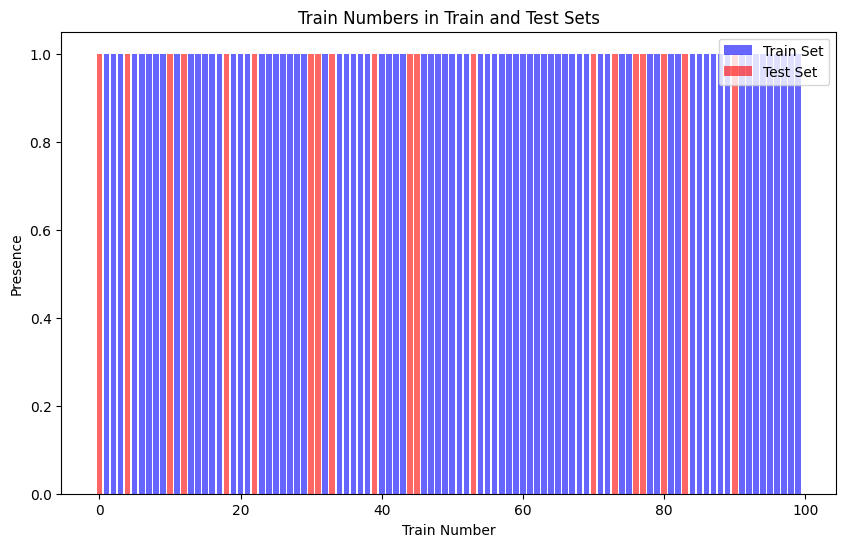

In [ ]:
import matplotlib.pyplot as plt

train_numbers_train = transformed_df.iloc[train_idx]['train_number'].unique()
train_numbers_test = transformed_df.iloc[test_idx]['train_number'].unique()

intersection = set(train_numbers_train).intersection(set(train_numbers_test))

plt.figure(figsize=(10, 6))

plt.bar(train_numbers_train, [1] * len(train_numbers_train), color='blue', alpha=0.6, label='Train Set')
plt.bar(train_numbers_test, [1] * len(train_numbers_test), color='red', alpha=0.6, label='Test Set')

plt.xlabel('Train Number')
plt.ylabel('Presence')
plt.title('Train Numbers in Train and Test Sets')
plt.legend()

if intersection:
    print("WARNING: The following train_numbers are in both subsets:", intersection)
    for train_number in intersection:
        plt.bar(train_number, 1, color='green', alpha=1, label='Intersection')
else:
    print("No train_number appears in both train and test sets.")

plt.show()

In [ ]:
## Model Training
optimizer = torch.optim.Adam(P.parameters(), lr=0.001)
def compute_accuracy(loader):
    mean_accuracy = 0.0
    for data, labels in loader:
        predictions = east(data).detach().numpy()
        predictions = np.argmax(predictions, axis=1)
        mean_accuracy += accuracy_score(labels, predictions)

    return mean_accuracy / len(loader)

for epoch in range(2000):
    train_loss = 0.0
    for batch_idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        x_W = ltn.Variable("x_W", data[labels == 0]) # West samples
        x_E = ltn.Variable("x_E", data[labels == 1]) # East samples
        sat_agg = SatAgg(
            Forall(x_W, P(x_W, l_W, training=True)),
            Forall(x_E, P(x_E, l_E, training=True)),
        )
        loss = 1. - sat_agg
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader)

    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Test Sat %.3f | Train Acc %.3f | Test Acc %.3f"
              %(epoch, train_loss, compute_sat_level(train_loader), compute_sat_level(test_loader),
                    compute_accuracy(train_loader), compute_accuracy(test_loader)))

 epoch 0 | loss 0.5258 | Train Sat 0.480 | Test Sat 0.480 | Train Acc 0.500 | Test Acc 0.500
 epoch 20 | loss 0.5036 | Train Sat 0.502 | Test Sat 0.501 | Train Acc 0.512 | Test Acc 0.500
 epoch 40 | loss 0.5042 | Train Sat 0.503 | Test Sat 0.502 | Train Acc 0.688 | Test Acc 0.569
 epoch 60 | loss 0.4947 | Train Sat 0.505 | Test Sat 0.504 | Train Acc 0.696 | Test Acc 0.552
 epoch 80 | loss 0.4945 | Train Sat 0.507 | Test Sat 0.505 | Train Acc 0.710 | Test Acc 0.552
 epoch 100 | loss 0.4995 | Train Sat 0.508 | Test Sat 0.506 | Train Acc 0.600 | Test Acc 0.517
 epoch 120 | loss 0.4997 | Train Sat 0.509 | Test Sat 0.507 | Train Acc 0.576 | Test Acc 0.517
 epoch 140 | loss 0.5013 | Train Sat 0.511 | Test Sat 0.508 | Train Acc 0.604 | Test Acc 0.517
 epoch 160 | loss 0.4932 | Train Sat 0.511 | Test Sat 0.508 | Train Acc 0.606 | Test Acc 0.517
 epoch 180 | loss 0.5081 | Train Sat 0.511 | Test Sat 0.509 | Train Acc 0.604 | Test Acc 0.534
 epoch 200 | loss 0.4914 | Train Sat 0.512 | Test Sat 0.

In [ ]:
all_loader = DataLoader(X, y, 64, shuffle=False)
compute_accuracy(all_loader)
for data, labels in all_loader:
    predictions = east(data).detach().numpy()
    predictions = np.argmax(predictions, axis=1)
    print(predictions, labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] tensor([0., 0., 0., 0., 0., 0